<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/%5BAnswer%5D_Exercise_Week_3_Pandas_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [44]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv'
df = pd.read_csv(url)

1. display 5 columns from dataset

> Add blockquote



In [45]:
#1
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [46]:
#2
df.info()

#conclusion
# There are several null data in column race and also lot of null data in admission column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [47]:
#3a
print(df['admission'].value_counts(dropna=False))

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [48]:
#3b
print(df['race'].value_counts(dropna=False))

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [49]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

<ipython-input-49-12caece74d44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-49-12caece74d44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

5. recheck missing value

In [50]:
#5
print(df.isnull().sum())

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64


6. drop application_id column

In [51]:
# 6
df.drop(columns=['application_id'], inplace=True)

7. show describe column and conclude what the insight is from that column

In [52]:
#7
df.describe()

#conclusion
# The dataset indicates that applicants have strong academic credentials, with an average GPA of 3.25 and GMAT scores averaging 651, which are both within competitive ranges for MBA programs.
# Most applicants have between 4 to 6 years of professional experience, with an average of 5 years.
# This suggests that the applicant pool is composed of individuals who are both academically capable and professionally experienced, making them strong candidates for MBA admissions.
# The range in work experience (1 to 9 years) also reflects diversity in career stages among applicants.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


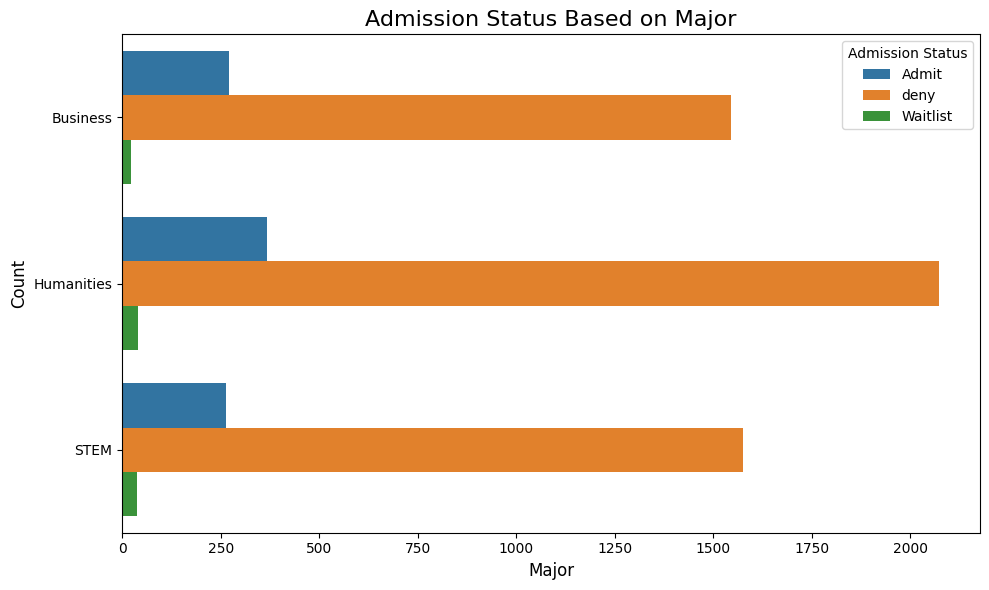

In [53]:
#8
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='major', hue='admission')

plt.title('Admission Status Based on Major', fontsize=16)
plt.xlabel('Major', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Admission Status')
plt.tight_layout()

plt.show()

#conclusion
# Majority of the admissions is denied in all majors, and there are several admitted admissions also there are a little amount of admission that are currently in the waiting list

9. make a visualization to analyze the admissions in each major based on gender

and explain the conclusions

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


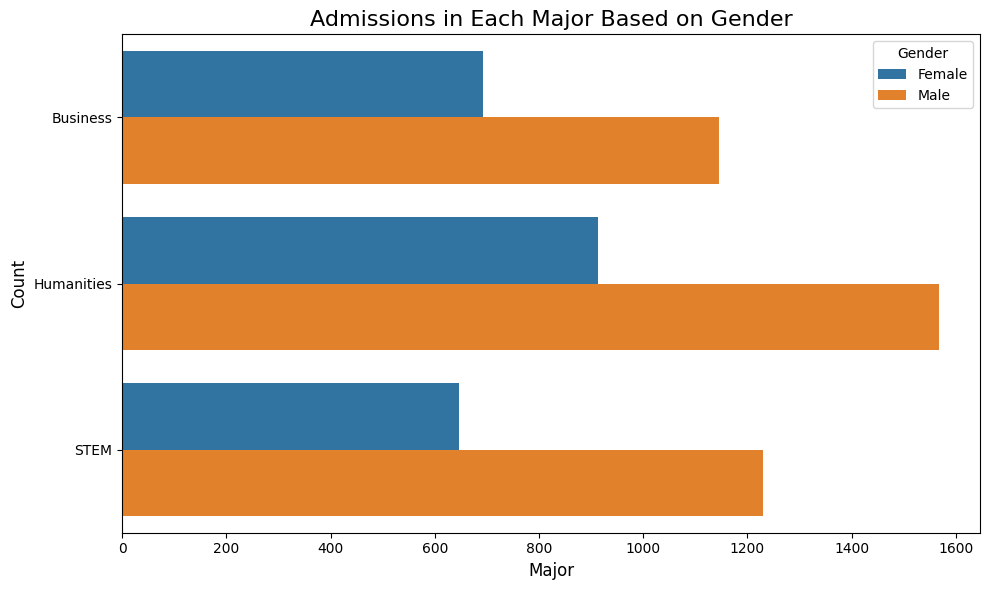

In [54]:
#9
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='major', hue='gender')

plt.title('Admissions in Each Major Based on Gender', fontsize=16)
plt.xlabel('Major', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

#conclude
# Most gender in every major are male, but the difference gap of male and female aren't very big

10. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-55-8803180fdc80>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_gpa, x='admission', y='gpa', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

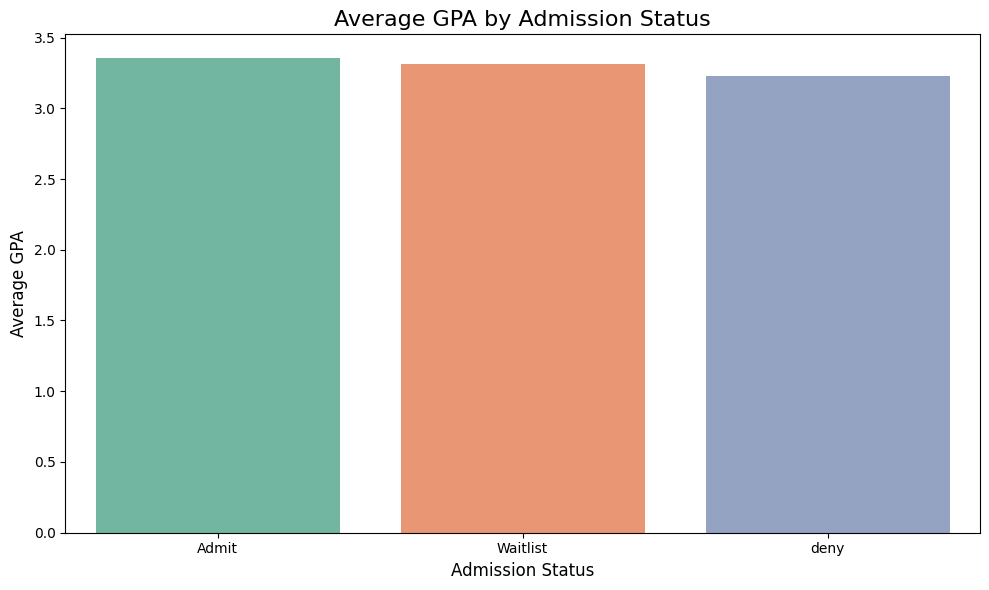

In [55]:
#10
average_gpa = df.groupby('admission')['gpa'].mean().reset_index()

# Visualization: Average GPA by Admission Status
plt.figure(figsize=(10, 6))
sns.barplot(data=average_gpa, x='admission', y='gpa', palette='Set2')

plt.title('Average GPA by Admission Status', fontsize=16)
plt.xlabel('Admission Status', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.tight_layout()

plt.show()


# This bar chart shows the average GPA for each admission status (Admit, Waitlist, Deny).
# It highlights how GPA may influence the admission decision, revealing that admitted students tend to have a higher average GPA compared to those who are waitlisted or denied.

11. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


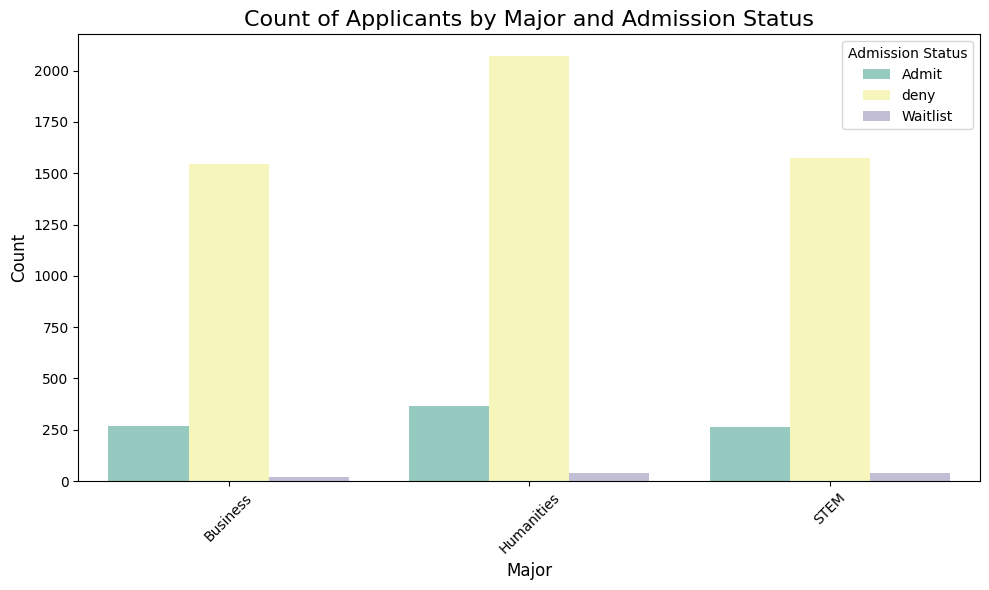

In [56]:
#11
# Visualization: Count of Applicants by Major and Admission Status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='major', hue='admission', palette='Set3')

plt.title('Count of Applicants by Major and Admission Status', fontsize=16)
plt.xlabel('Major', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Admission Status')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# This count plot displays the number of applicants in each major, broken down by their admission status.
# It provides insight into which majors are more competitive in the admission process, showing that Business and STEM majors generally have higher admission counts compared to Humanities.

12. encode categorical columns and display the results

In [57]:
#12a
from sklearn.preprocessing import LabelEncoder

#encode X

X = df.drop('admission', axis=1)

columns = ['gender', 'international', 'major', 'race', 'work_industry']

label_encoders = {}
for col in columns:
    le = LabelEncoder()
    X[col] = LabelEncoder().fit_transform(X[col])
    label_encoders[col] = le

df[columns] = X[columns]

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [58]:
#12b
#encode y
df['admission'] = LabelEncoder().fit_transform(df['admission'])
y = df['admission']

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion



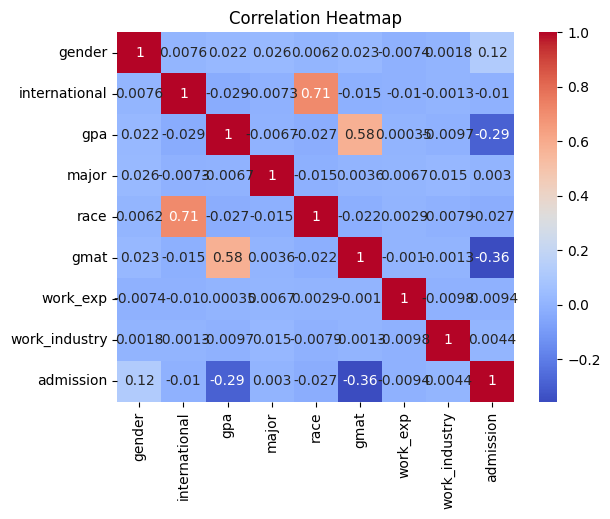

In [78]:
#13
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

#Conclusion

# This code creates a colorful chart that shows how different
# factors in our data are related. By looking at the colors and
# numbers on the chart, we can see which factors tend to move
# together and which ones don't. For example, we might see that
# people with higher GPAs also tend to have higher GMAT scores.
# This helps us understand how different things are connected in our data.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [77]:
#Challenge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

average_gpa = df['gpa'].mean()
print("Average GPA:", average_gpa)

lisa_data = {
    'gender': [0],
    'international': [0],
    'gpa': [average_gpa],
    'major': [0],  # Assuming "Entrepreneurship" is business
    'race': [0],  # Assuming "Asian" is encoded as 0
    'gmat': [580],
    'work_exp': [2],
    'work_industry': [3]  # Assuming "Finance" is encoded as 3
}

lisa_df = pd.DataFrame(lisa_data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# param_grid = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

best_rf = GradientBoostingClassifier(random_state=10)

# grid_search = GridSearchCV(
#     rf,
#     param_grid,
#     verbose=1,
#     n_jobs=-1,
#     cv=3,
#     scoring='accuracy'
# )

# grid_search.fit(X_train, y_train)

# best_rf = grid_search.best_estimator_

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

prediction = best_rf.predict(lisa_df)

admission_mapping = {0: "Admit", 1: "Waiting List", 2: "Deny"}

prediction_result = admission_mapping[prediction[0]]

print("Lisa's Admission Prediction:", prediction_result)


Average GPA: 3.2507135938004517
Accuracy: 0.841000807102502
Lisa's Admission Prediction: Deny
